In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from QHO_functions import *


In [71]:
def radial_function(a, n, l, r):
    Rnl = ( math.sqrt((2 / (n * a))**3 * math.factorial(n - l - 1) / (2 * n * math.factorial(n + l)))
           * np.exp(-r / (n * a)) * (2 * r / (n * a))**l
           * scipy_genlaguerre(n - l - 1, 2 * l + 1, 2 * r / (n * a)) )

    return Rnl


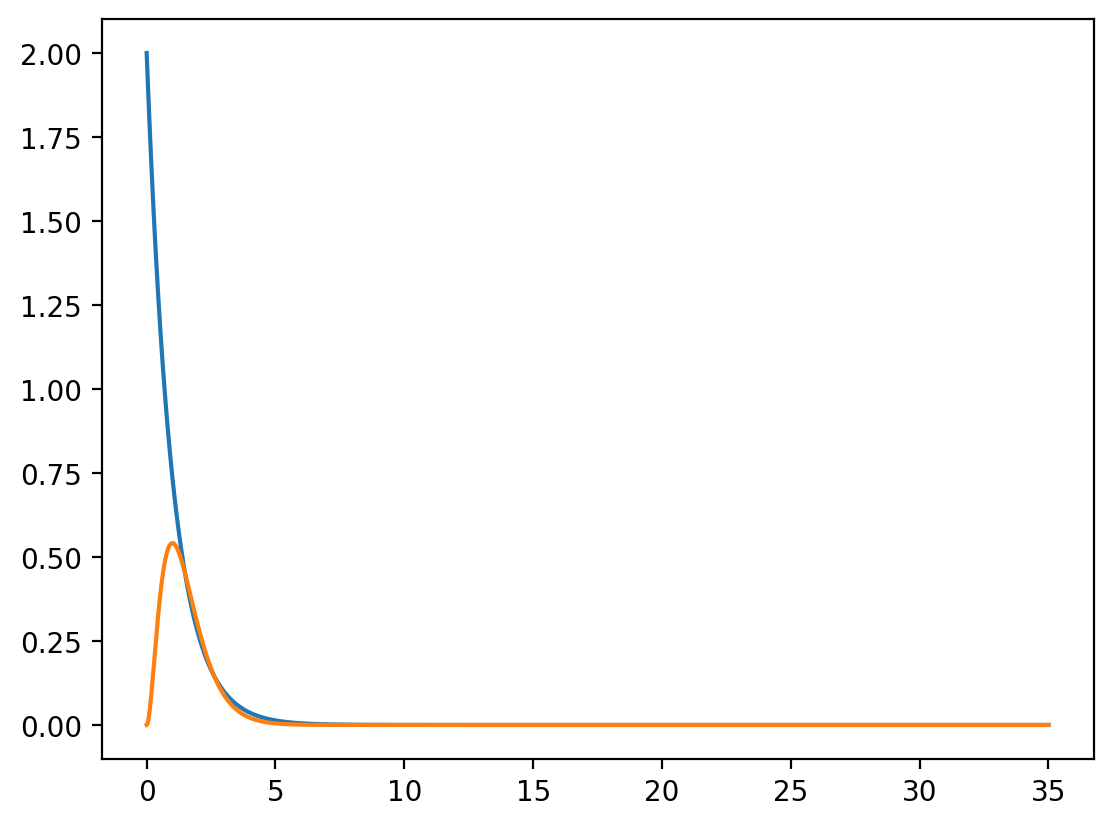

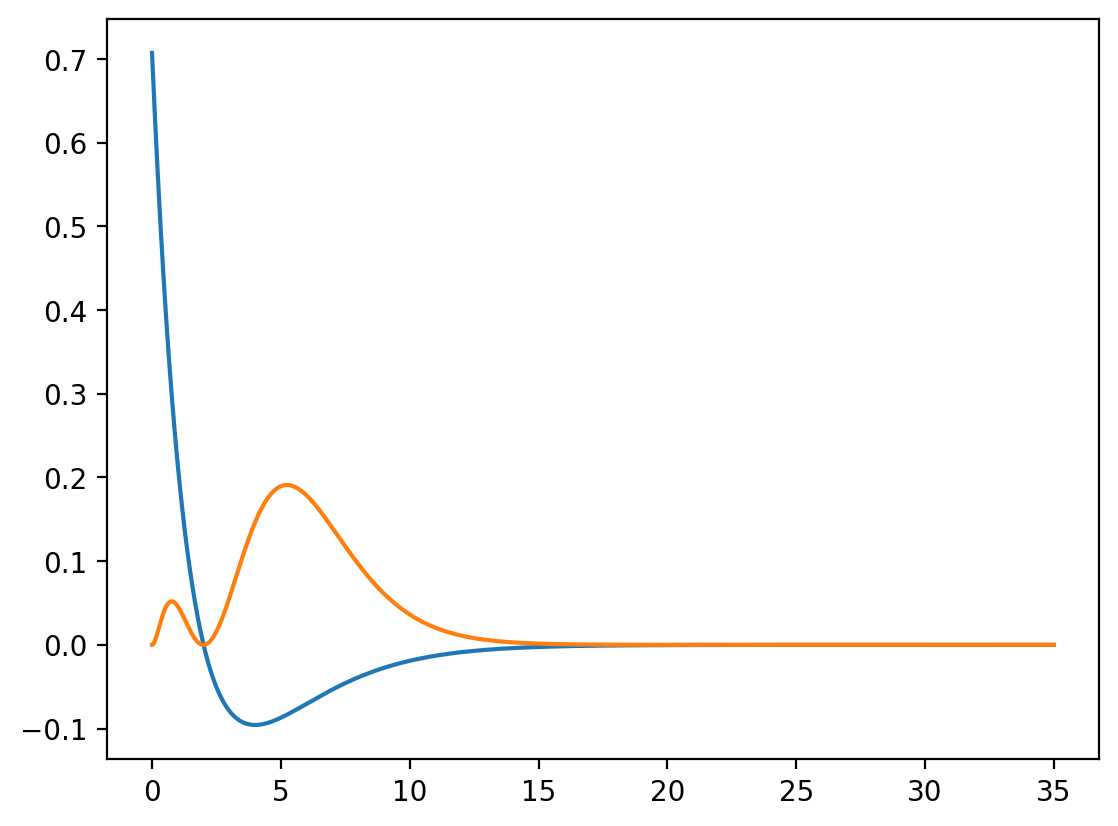

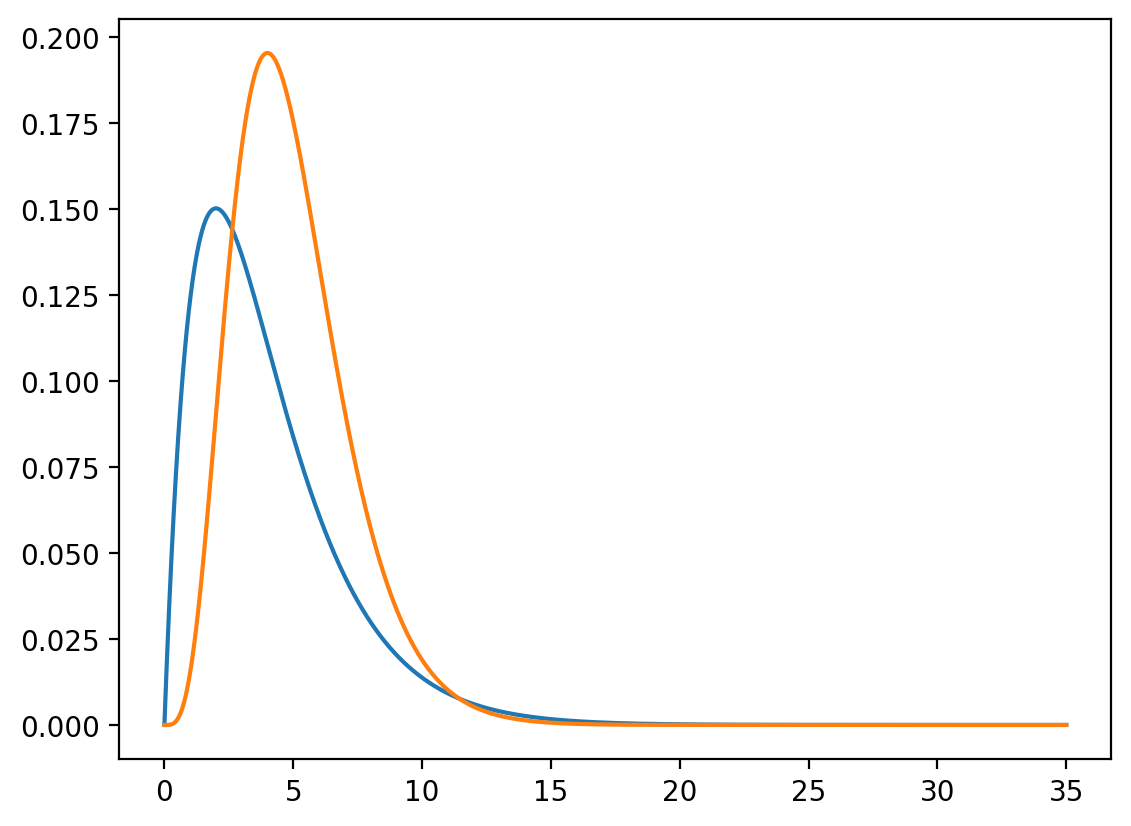

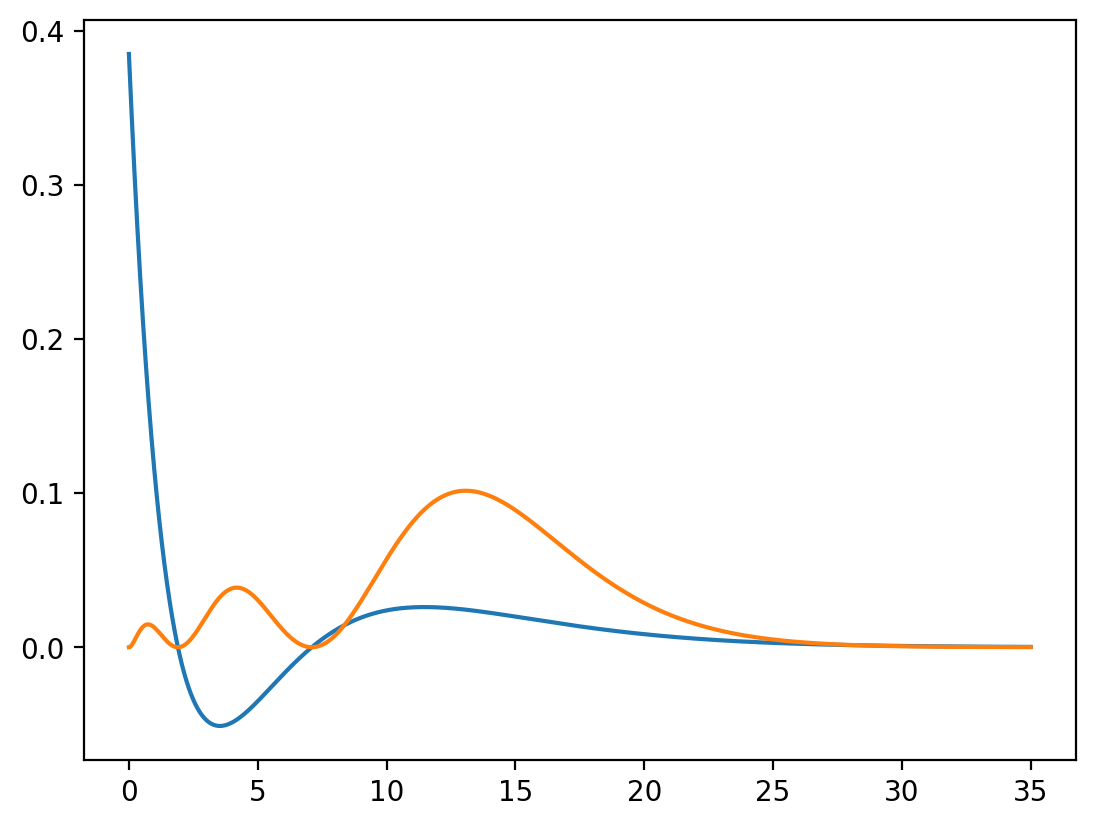

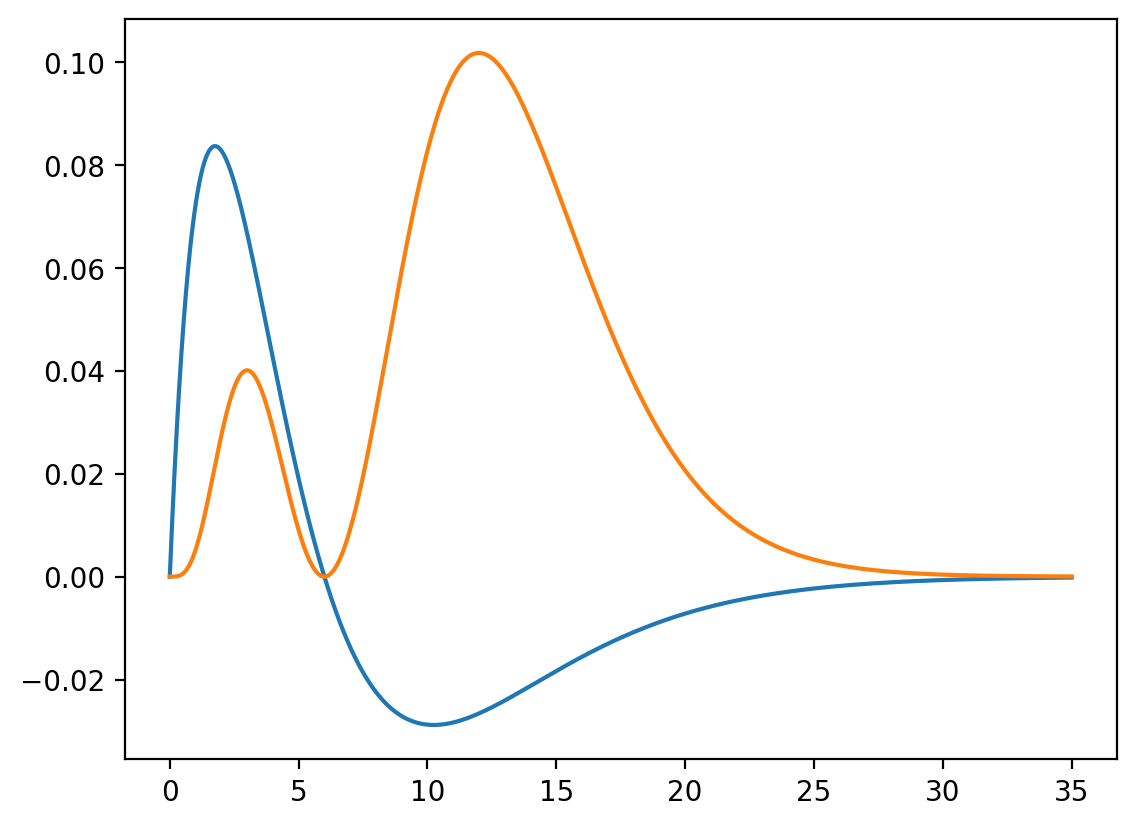

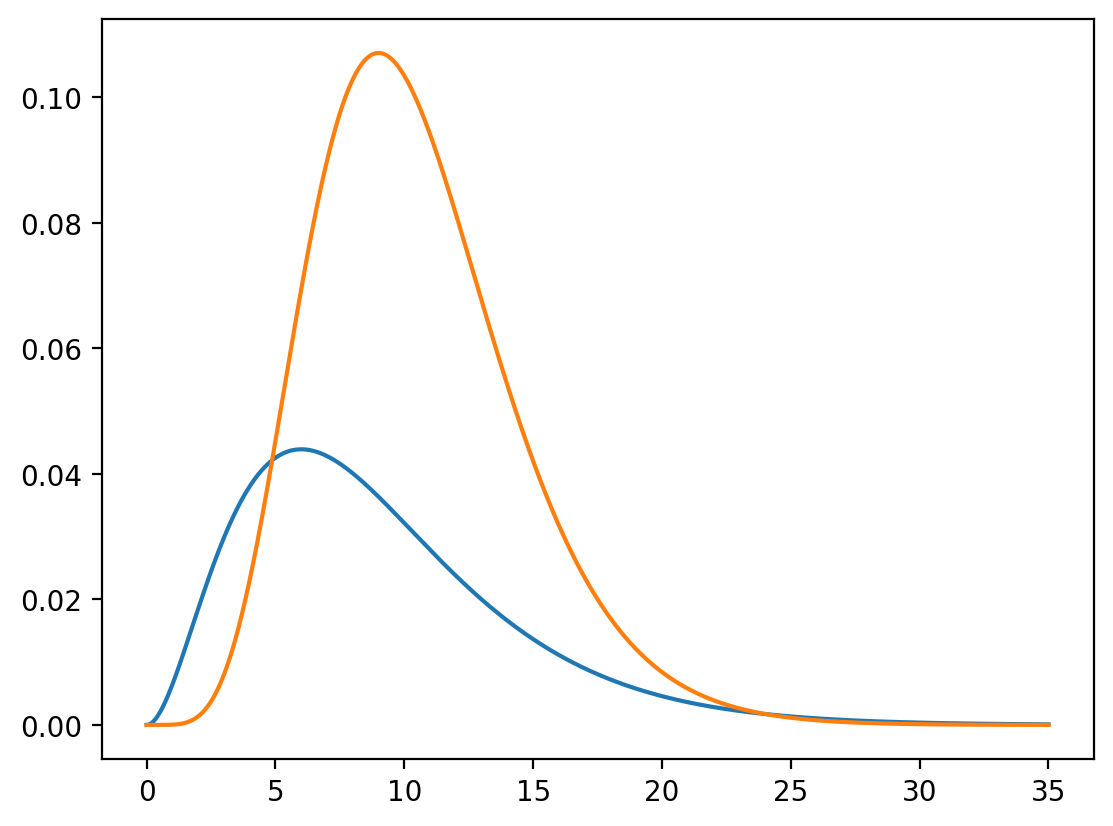

In [70]:
# Coordinates
r_min = 0
r_max = 35
dr = 0.01
r = np.arange(r_min,r_max+dr,dr)

# Orbitals
n = np.array([1, 2, 2, 3, 3, 3])
l = np.array([0, 0, 1, 0, 1, 2])

# Radial function
a = 1

for i in range(np.size(n)):
    plt.plot(r,radial_function(a,n[i],l[i],r))
    plt.plot(r,r**2 * abs2(radial_function(a,n[i],l[i],r)))
    plt.show()


In [27]:
def laguerre_coeff(n,k):
    if k > n:
        return 0
    else:
        return (-1)**k * math.comb(n,k) / math.factorial(k)

In [34]:
x = np.arange(-10,10+0.2,0.2)

a = np.vstack(np.array([2, -5, 7, -3, 8, 2]))
N = np.size(a)

C = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        C[i][j] = laguerre_coeff(j,i)

b = np.linalg.inv(C) @ a

y1, y2 = 0, 0

for n in range(N):
    y1 += a[n][0] * x**n
    y2 += b[n][0] * scipy_genlaguerre(n,0,x)


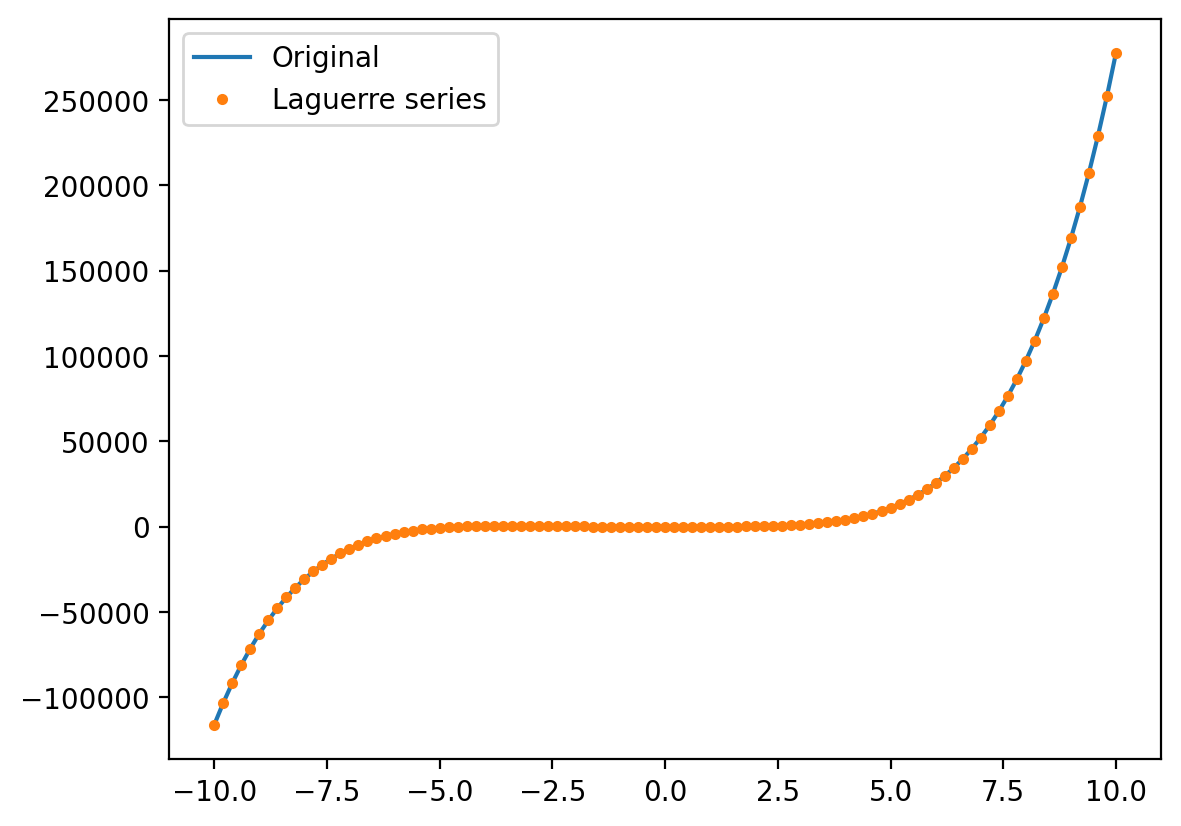

In [36]:
plt.plot(x,y1, label='Original')
plt.plot(x,y2,'.', label='Laguerre series')

plt.legend()

plt.show()
